# Importing Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


# Loading Data

In [22]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# Printing the shape of data

In [23]:
X_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [24]:
X_test.shape, y_test.shape


((10000, 28, 28), (10000,))

In [25]:
X_train[0]  # Image data in 2d numpy arrat shape 28x28 pixel


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [26]:
y_train[0]    # 9 ===> Ankle Boot


9

In [27]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress",
                "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot 
'''


'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot \n'

# Show Image

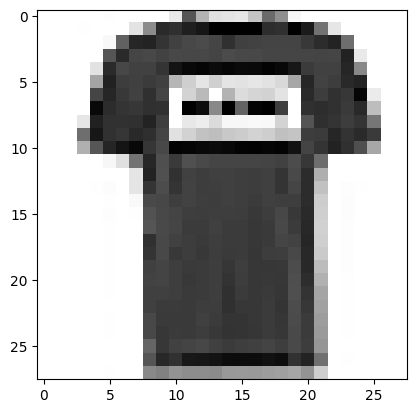

In [28]:
plt.imshow(X_train[1], cmap='Greys')


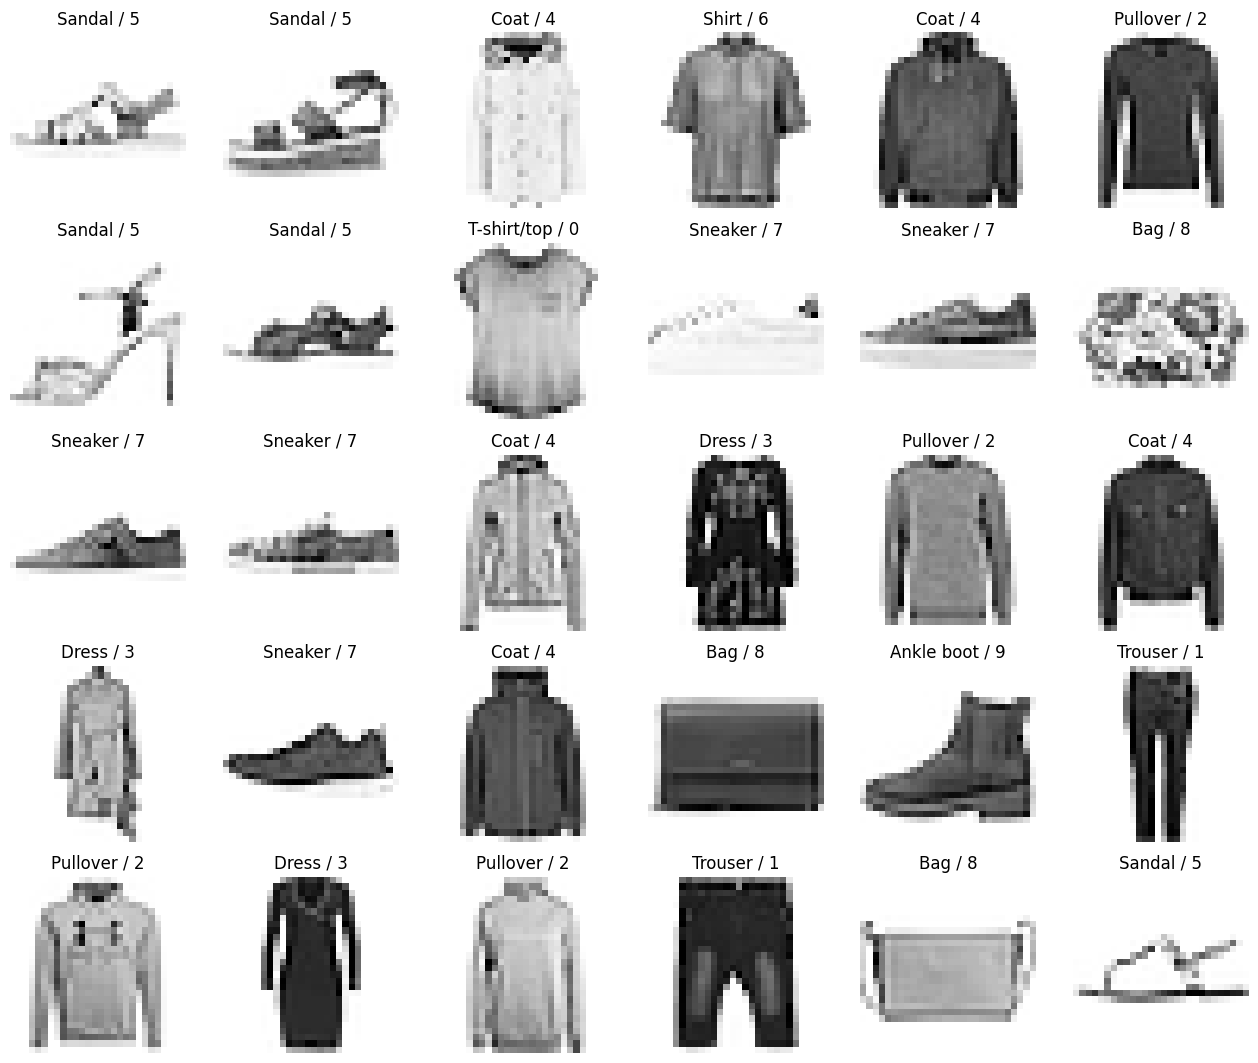

In [29]:
plt.figure(figsize=(16, 16))

j = 1

for i in np.random.randint(0, 1000, 30):
    plt.subplot(6, 6, j)
    j += 1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))


# Changing Dimensions 

In [30]:
X_train.shape


(60000, 28, 28)

In [31]:
X_train.ndim

3

In [32]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increased the dimension form 3 to 4

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


In [33]:
X_train.ndim


4

# Feature Scaling


In [34]:
X_train = X_train/255
X_test = X_test/255


# Split dataset


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_Validation, y_train, y_Validation = train_test_split( X_train, y_train, test_size=0.2, random_state=2020 )

In [36]:
X_train.shape, X_Validation.shape, y_train.shape, y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# Building the CNN Model (Convolutional Neural Network Model)

In [37]:
# Building CNN Model

cnn_model = keras.models.Sequential([
        keras.layers.Conv2D( filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=[28, 28, 1] ),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=10, activation='softmax')
])

In [38]:
# Getting the summary of Model

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [39]:
# Compiling the Model

cnn_model.compile( optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'] )


In [40]:
# Training the cnn model
cnn_model.fit( X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation) )

Epoch 1/10
94/94 [==============================] - 10s 99ms/step - loss: 0.6258 - accuracy: 0.7884 - val_loss: 0.4147 - val_accuracy: 0.8554
Epoch 2/10
94/94 [==============================] - 9s 94ms/step - loss: 0.3635 - accuracy: 0.8730 - val_loss: 0.3501 - val_accuracy: 0.8778
Epoch 3/10
94/94 [==============================] - 9s 95ms/step - loss: 0.3174 - accuracy: 0.8884 - val_loss: 0.3312 - val_accuracy: 0.8838
Epoch 4/10
94/94 [==============================] - 9s 100ms/step - loss: 0.2878 - accuracy: 0.8985 - val_loss: 0.3046 - val_accuracy: 0.8945
Epoch 5/10
94/94 [==============================] - 10s 105ms/step - loss: 0.2720 - accuracy: 0.9034 - val_loss: 0.2989 - val_accuracy: 0.8947
Epoch 6/10
94/94 [==============================] - 8s 86ms/step - loss: 0.2515 - accuracy: 0.9114 - val_loss: 0.3064 - val_accuracy: 0.8938
Epoch 7/10
94/94 [==============================] - 8s 87ms/step - loss: 0.2399 - accuracy: 0.9145 - val_loss: 0.2788 - val_accuracy: 0.9028
Epoch 8/1

# Testing The CNN Model

In [41]:
y_pred = cnn_model.predict( X_test )
y_pred.round(2)


313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.2 , 0.02, 0.  ]], dtype=float32)

In [42]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [43]:
cnn_model.evaluate( X_test, y_test )


313/313 [==============================] - 2s 5ms/step - loss: 0.2768 - accuracy: 0.8978


[0.2767839729785919, 0.8978000283241272]

# Visualize Output 

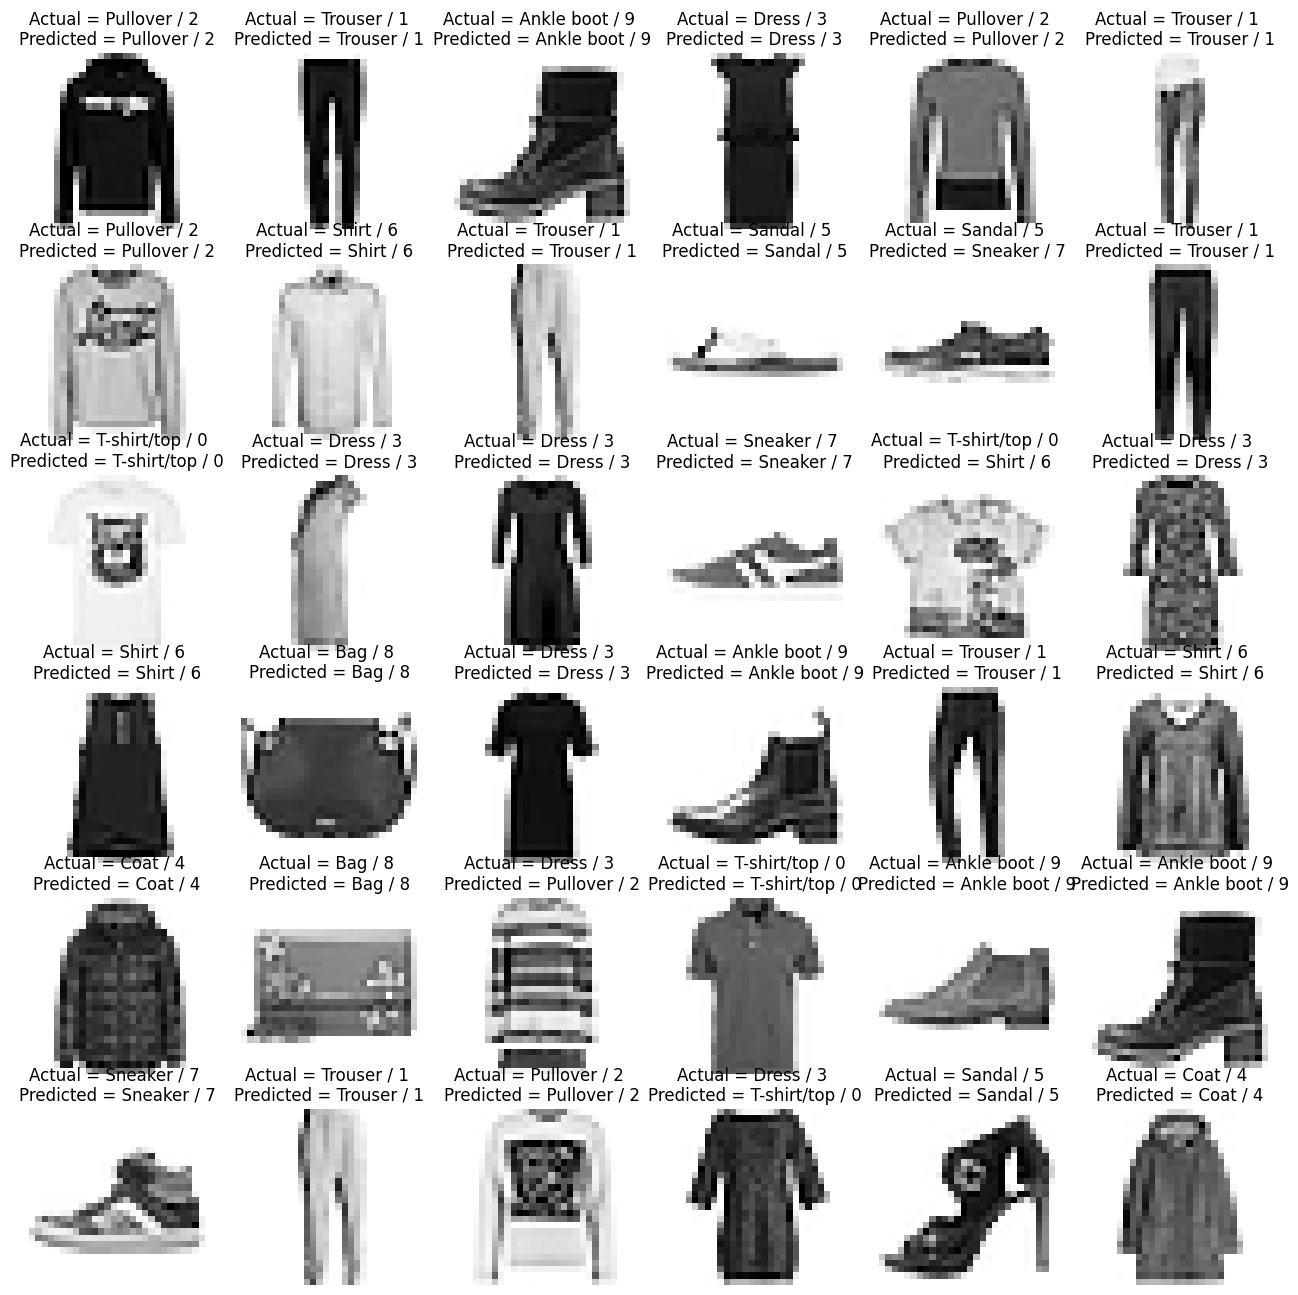

In [44]:
plt.figure( figsize = (16, 16) )

j = 1

for i in np.random.randint(0, 1000, 36):
    plt.subplot(6, 6, j)
    j += 1
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i]) ))
    plt.axis('off')

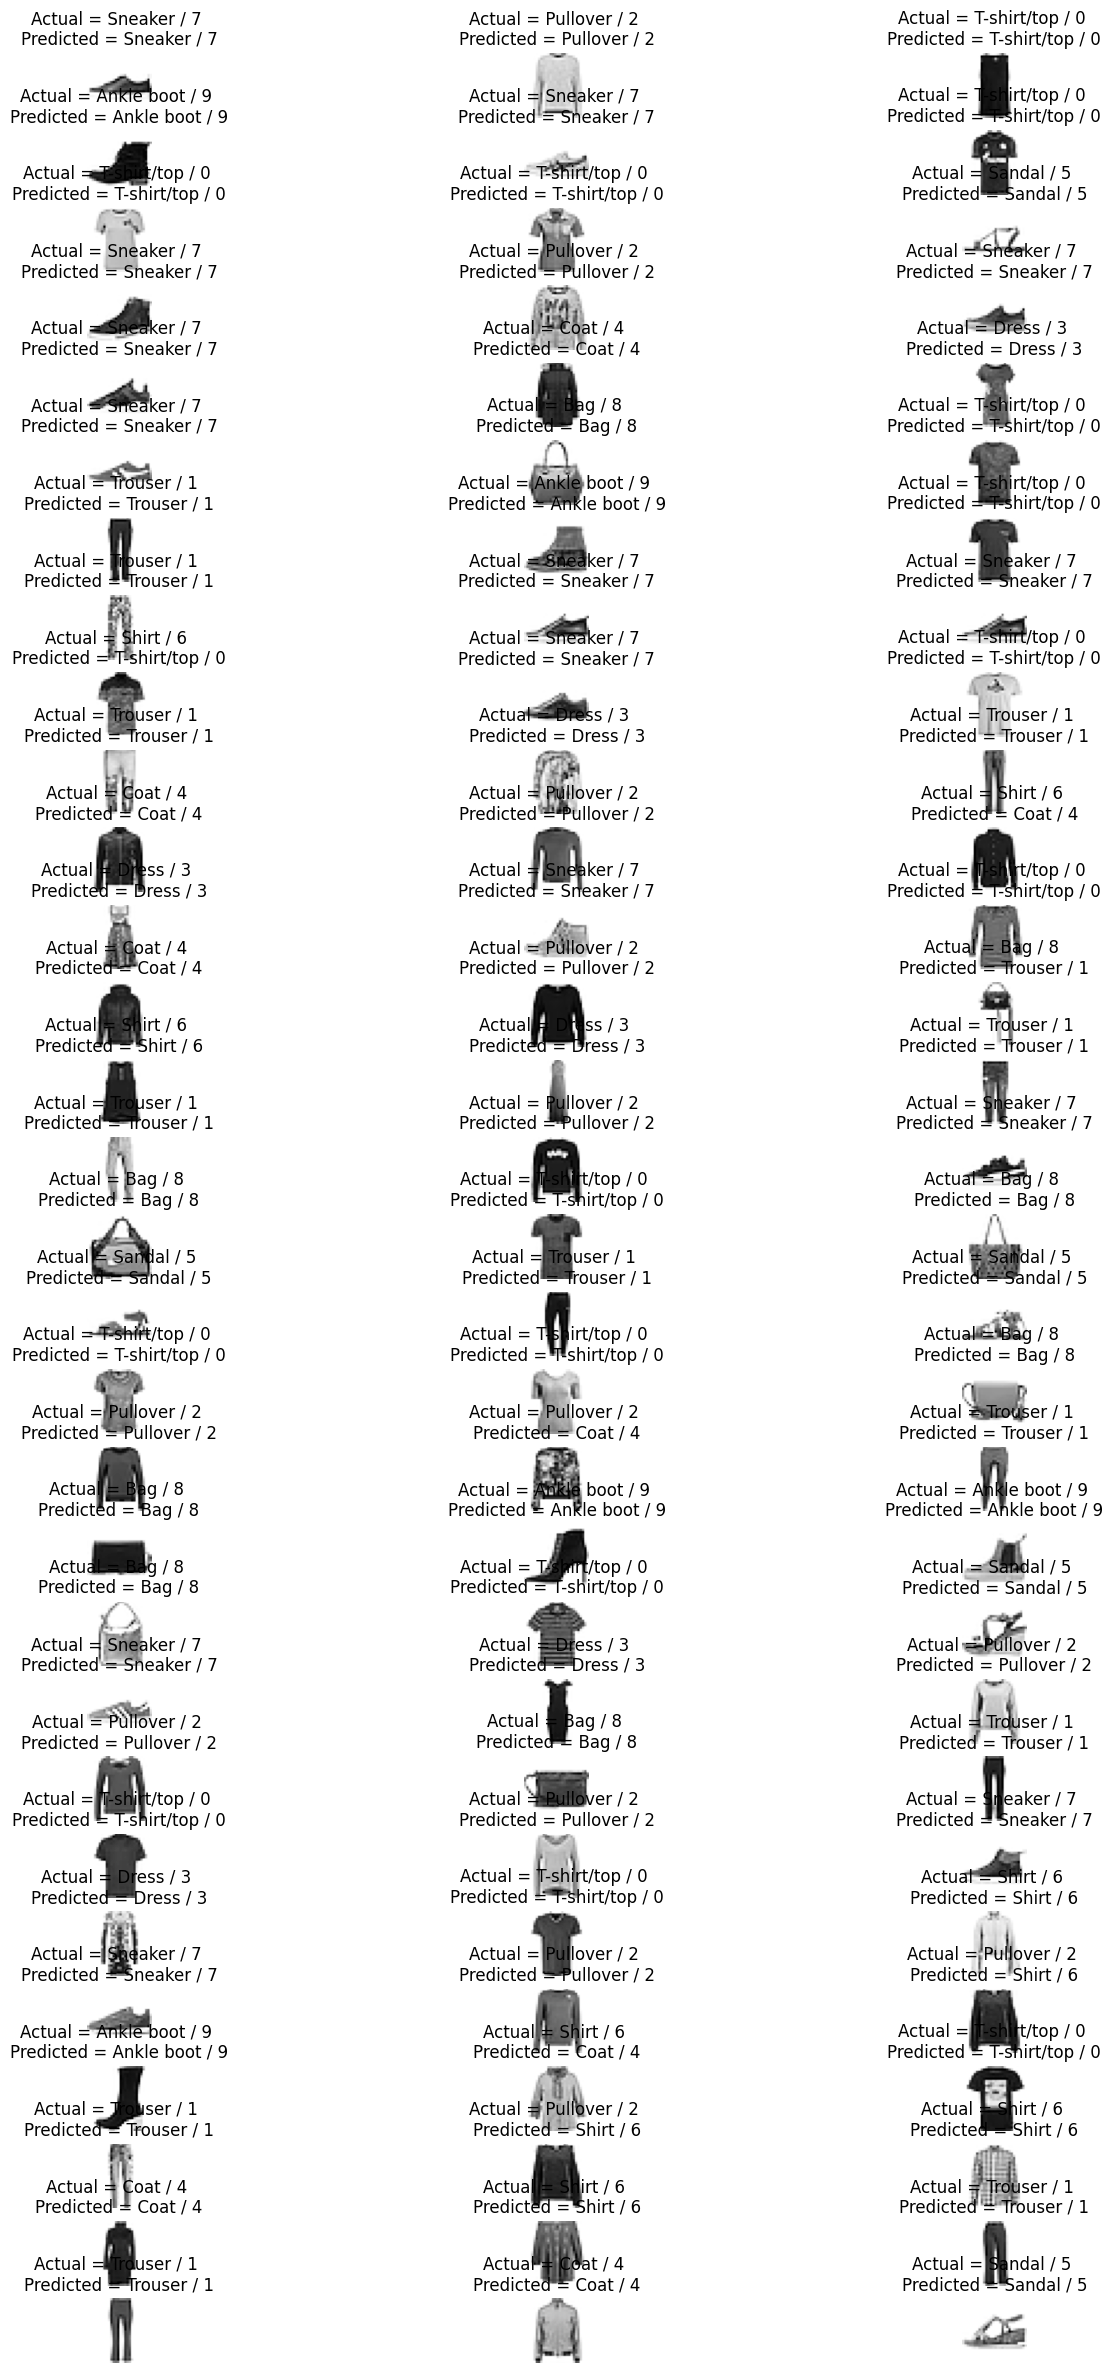

In [45]:
plt.figure( figsize = (16, 30) )

j = 1 
for i in np.random.randint(0, 1000, 90):
    plt.subplot(30, 3, j)
    j += 1
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format( class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i] )))
    plt.axis('off')

# Confusion Matrix

<AxesSubplot: >

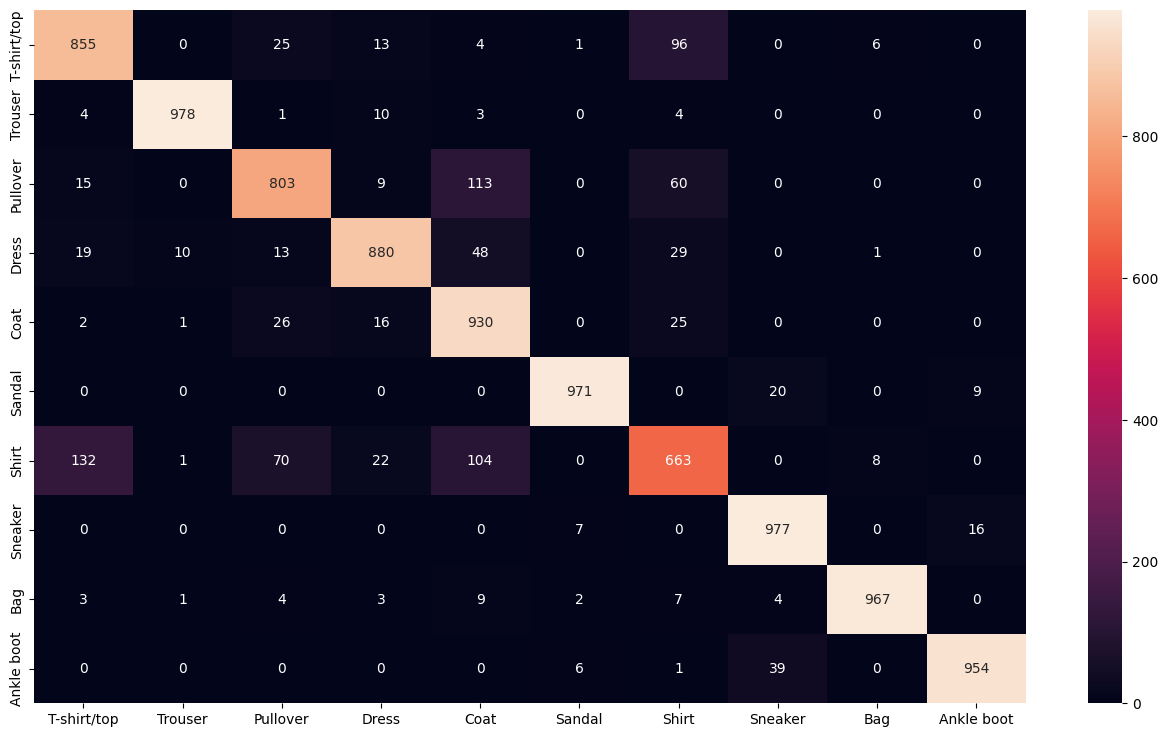

In [46]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16, 9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)


# Displaying Confusion Matrix
sns.heatmap( cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels )


In [47]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.80      0.83      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.77      0.93      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.75      0.66      0.70      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Saving Model


In [48]:
# Save Model

cnn_model.save('fashion_mnist_cnn_model.h5')

In [49]:
# Load Model 

fashion_mnist_cnn_model = keras.models.load_model( 'fashion_mnist_cnn_model.h5' )

In [50]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [51]:
np.argmax(Y_pred_sample[0])

9

In [52]:
y_test[0]

9

# CNN Model 2 -- Building Complex CNN Model 

In [53]:
# Building CNN model

cnn_model_2 = keras.models.Sequential([
            keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=[28, 28, 1]),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(units=128, activation='relu'),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(units=256, activation='relu'),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(units=128, activation='relu'),
            keras.layers.Dense(units=10, activation='softmax')
])


# Compiling the  CNN Model

cnn_model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] ) 


# Training the  CNN Model

cnn_model_2.fit( X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation) )

# Saving the CNN Model
cnn_model_2.save('fashion_mnist_cnn_model_2.h5')

Epoch 1/20
94/94 [==============================] - 11s 108ms/step - loss: 1.0226 - accuracy: 0.6158 - val_loss: 0.5775 - val_accuracy: 0.7703
Epoch 2/20
94/94 [==============================] - 9s 97ms/step - loss: 0.5421 - accuracy: 0.7959 - val_loss: 0.4567 - val_accuracy: 0.8323
Epoch 3/20
94/94 [==============================] - 10s 106ms/step - loss: 0.4505 - accuracy: 0.8344 - val_loss: 0.3984 - val_accuracy: 0.8534
Epoch 4/20
94/94 [==============================] - 9s 98ms/step - loss: 0.3935 - accuracy: 0.8568 - val_loss: 0.3575 - val_accuracy: 0.8698
Epoch 5/20
94/94 [==============================] - 9s 99ms/step - loss: 0.3574 - accuracy: 0.8699 - val_loss: 0.3360 - val_accuracy: 0.8774
Epoch 6/20
94/94 [==============================] - 10s 106ms/step - loss: 0.3344 - accuracy: 0.8779 - val_loss: 0.3222 - val_accuracy: 0.8802
Epoch 7/20
94/94 [==============================] - 10s 108ms/step - loss: 0.3155 - accuracy: 0.8835 - val_loss: 0.3051 - val_accuracy: 0.8863
Epoch

# CNN Model 3 -- Building Very Complex CNN Model

In [54]:
cnn_model_3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10, activation='softmax')
])

# compiling the CNN Model
cnn_model_3.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

# Training the CNN Model
cnn_model_3.fit(X_train, y_train, epochs=50, batch_size=512,verbose=1, validation_data=(X_Validation, y_Validation))

#Saving the CNN Model
cnn_model_3.save('fashion_mnist_cnn_model_3.h5')

#Testing the CNN Model
cnn_model_3.evaluate(X_test, y_test)


Epoch 1/50
94/94 [==============================] - 26s 262ms/step - loss: 1.1852 - accuracy: 0.5275 - val_loss: 0.6476 - val_accuracy: 0.7406
Epoch 2/50
94/94 [==============================] - 23s 246ms/step - loss: 0.6232 - accuracy: 0.7650 - val_loss: 0.5062 - val_accuracy: 0.8052
Epoch 3/50
94/94 [==============================] - 22s 237ms/step - loss: 0.5033 - accuracy: 0.8138 - val_loss: 0.4571 - val_accuracy: 0.8288
Epoch 4/50
94/94 [==============================] - 23s 250ms/step - loss: 0.4336 - accuracy: 0.8439 - val_loss: 0.4006 - val_accuracy: 0.8531
Epoch 5/50
94/94 [==============================] - 23s 243ms/step - loss: 0.3829 - accuracy: 0.8646 - val_loss: 0.3443 - val_accuracy: 0.8750
Epoch 6/50
94/94 [==============================] - 22s 238ms/step - loss: 0.3466 - accuracy: 0.8776 - val_loss: 0.3303 - val_accuracy: 0.8805
Epoch 7/50
94/94 [==============================] - 22s 234ms/step - loss: 0.3209 - accuracy: 0.8860 - val_loss: 0.3076 - val_accuracy: 0.8921

[0.48140469193458557, 0.902999997138977]